In [2]:
!pip install keras
!pip install tensorflow

In [42]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, KFold




In [4]:
df=pd.read_csv('forestfires (1).csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
df1=df.drop(['month','day'],axis=1)
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
lb=LabelEncoder()

In [9]:
df1['size_category']=lb.fit_transform(df1['size_category'])

In [10]:
df2=df1.values
df2.shape

(517, 29)

In [11]:
x=df2[:,0:28]
y=df2[:,-1]
x.shape

(517, 28)

In [13]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [15]:
model.fit(x, y, validation_split=0.33,epochs=100, batch_size=5)

Epoch 1/100
70/70 [==============================] - 3s 16ms/step - loss: 11.2898 - accuracy: 0.6936 - val_loss: 1.4140 - val_accuracy: 0.6316
Epoch 2/100
70/70 [==============================] - 0s 6ms/step - loss: 0.8298 - accuracy: 0.7312 - val_loss: 0.8998 - val_accuracy: 0.7485
Epoch 3/100
70/70 [==============================] - 0s 6ms/step - loss: 0.5297 - accuracy: 0.8064 - val_loss: 0.6686 - val_accuracy: 0.6784
Epoch 4/100
70/70 [==============================] - 0s 6ms/step - loss: 0.5062 - accuracy: 0.8035 - val_loss: 0.5731 - val_accuracy: 0.8012
Epoch 5/100
70/70 [==============================] - 0s 6ms/step - loss: 0.3970 - accuracy: 0.8324 - val_loss: 0.5137 - val_accuracy: 0.7368
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3889 - accuracy: 0.8555 - val_loss: 0.7046 - val_accuracy: 0.8012
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3432 - accuracy: 0.8699 - val_loss: 0.3977 - val_accuracy: 0.8363
Epoch 8/100

Epoch 59/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0895 - accuracy: 0.9711 - val_loss: 0.2033 - val_accuracy: 0.9415
Epoch 60/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0541 - accuracy: 0.9827 - val_loss: 0.1401 - val_accuracy: 0.9649
Epoch 61/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0713 - accuracy: 0.9769 - val_loss: 0.1145 - val_accuracy: 0.9708
Epoch 62/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9827 - val_loss: 0.1692 - val_accuracy: 0.9298
Epoch 63/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0696 - accuracy: 0.9740 - val_loss: 0.0654 - val_accuracy: 0.9825
Epoch 64/100
70/70 [==============================] - 0s 5ms/step - loss: 0.1039 - accuracy: 0.9740 - val_loss: 0.0909 - val_accuracy: 0.9474
Epoch 65/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0158 - accuracy: 0.9942 - val_loss: 0.1707 - val_accuracy: 0.9357
Epoch 

In [16]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 0.9478
accuracy: 94.78%


In [ ]:
#  Gas Turbine

In [17]:
gs=pd.read_csv('gas_turbines.csv')
gs

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [18]:
gs1=gs.values
gs1

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [19]:
X=gs1[:,[0,1,2,3,4,5,6,8,9,10]]
Y=gs1[:,-4]
X

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25,random_state=101)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler=MinMaxScaler()
scaler.fit(xtrain)

MinMaxScaler()

In [25]:
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)
xtest

array([[0.35890393, 0.40602285, 0.91801706, ..., 0.34107329, 0.03084967,
        0.48475958],
       [0.55162803, 0.59086189, 0.72785444, ..., 0.42819611, 0.02833486,
        0.43366477],
       [0.69430373, 0.53478712, 0.55215014, ..., 0.14847583, 0.15186537,
        0.33822331],
       ...,
       [0.29923532, 0.48494289, 0.94876603, ..., 0.77514199, 0.00101504,
        0.41400706],
       [0.64399376, 0.35825545, 0.50904718, ..., 0.04705791, 0.10100297,
        0.36756316],
       [0.3486443 , 0.24340602, 0.81637941, ..., 0.34416412, 0.00787964,
        0.54170062]])

In [27]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# add nodes for prediction
model.add(Dense(1))

In [28]:
model.compile(optimizer='rmsprop',loss='mse')

In [29]:
# Fit the model
model.fit(xtrain, ytrain, epochs=250)

Epoch 1/250
353/353 [==============================] - 3s 4ms/step - loss: 13554.5547
Epoch 2/250
353/353 [==============================] - 1s 4ms/step - loss: 223.5974
Epoch 3/250
353/353 [==============================] - 1s 3ms/step - loss: 23.5899
Epoch 4/250
353/353 [==============================] - 1s 3ms/step - loss: 19.7737
Epoch 5/250
353/353 [==============================] - 1s 3ms/step - loss: 16.9461
Epoch 6/250
353/353 [==============================] - 1s 3ms/step - loss: 14.4286
Epoch 7/250
353/353 [==============================] - 1s 3ms/step - loss: 12.3978
Epoch 8/250
353/353 [==============================] - 1s 3ms/step - loss: 10.5090
Epoch 9/250
353/353 [==============================] - 1s 3ms/step - loss: 8.9653
Epoch 10/250
353/353 [==============================] - 1s 3ms/step - loss: 7.5119
Epoch 11/250
353/353 [==============================] - 1s 3ms/step - loss: 6.2342
Epoch 12/250
353/353 [==============================] - 1s 3ms/step - loss: 5.1515
E

353/353 [==============================] - 1s 4ms/step - loss: 0.9171
Epoch 100/250
353/353 [==============================] - 1s 4ms/step - loss: 0.9220
Epoch 101/250
353/353 [==============================] - 1s 3ms/step - loss: 0.9487
Epoch 102/250
353/353 [==============================] - 1s 3ms/step - loss: 0.9190
Epoch 103/250
353/353 [==============================] - 1s 3ms/step - loss: 0.9361
Epoch 104/250
353/353 [==============================] - 1s 3ms/step - loss: 0.9321
Epoch 105/250
353/353 [==============================] - 1s 3ms/step - loss: 0.9126
Epoch 106/250
353/353 [==============================] - 1s 4ms/step - loss: 0.9206
Epoch 107/250
353/353 [==============================] - 1s 4ms/step - loss: 0.9174
Epoch 108/250
353/353 [==============================] - 1s 4ms/step - loss: 0.9272
Epoch 109/250
353/353 [==============================] - 1s 4ms/step - loss: 0.9106
Epoch 110/250
353/353 [==============================] - 1s 4ms/step - loss: 0.9297
Epoch 

353/353 [==============================] - 1s 3ms/step - loss: 0.8796
Epoch 197/250
353/353 [==============================] - 1s 3ms/step - loss: 0.8815
Epoch 198/250
353/353 [==============================] - 1s 3ms/step - loss: 0.8649
Epoch 199/250
353/353 [==============================] - 1s 3ms/step - loss: 0.8862
Epoch 200/250
353/353 [==============================] - 1s 3ms/step - loss: 0.8713
Epoch 201/250
353/353 [==============================] - 1s 3ms/step - loss: 0.8732
Epoch 202/250
353/353 [==============================] - 1s 3ms/step - loss: 0.8775
Epoch 203/250
353/353 [==============================] - 1s 3ms/step - loss: 0.8632
Epoch 204/250
353/353 [==============================] - 1s 3ms/step - loss: 0.8629
Epoch 205/250
353/353 [==============================] - 1s 3ms/step - loss: 0.8571
Epoch 206/250
353/353 [==============================] - 1s 3ms/step - loss: 0.8662
Epoch 207/250
353/353 [==============================] - 1s 3ms/step - loss: 0.8725
Epoch 

<Axes: >

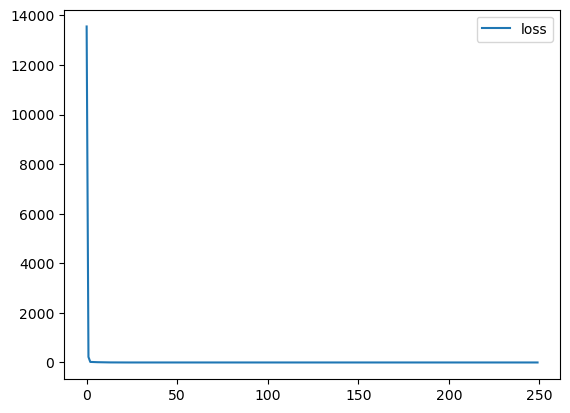

In [30]:
%matplotlib inline
import matplotlib as plot
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [31]:
pred = model.predict(xtest)

118/118 [==============================] - 1s 3ms/step


In [32]:
pred

array([[133.16237],
       [134.58768],
       [111.6483 ],
       ...,
       [161.35474],
       [105.08492],
       [133.43842]], dtype=float32)

In [33]:
pred = pred.ravel()

In [35]:
test_score = model.evaluate(xtest,ytest,verbose=0)
test_score

1.0567381381988525

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [37]:
mean_absolute_error(pred,ytest)

0.8194021253382906

In [38]:
mean_squared_error(pred,ytest)

1.0567379673621455

In [39]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'The Scatterplot of Relationship between Actual Values and Predictions')

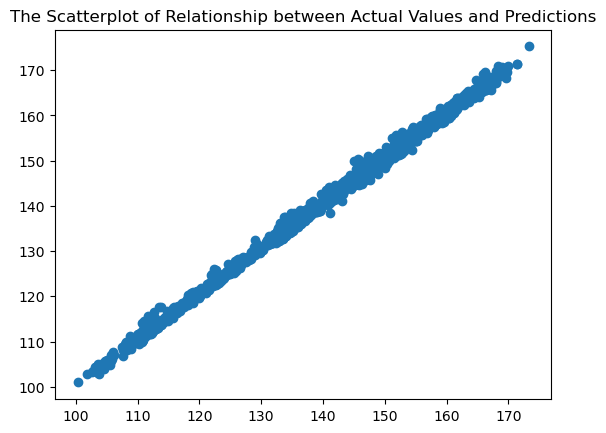

In [41]:
plt.scatter(ytest,pred)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")